In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jane-street-market-prediction/example_sample_submission.csv
/kaggle/input/jane-street-market-prediction/features.csv
/kaggle/input/jane-street-market-prediction/example_test.csv
/kaggle/input/jane-street-market-prediction/train.csv
/kaggle/input/jane-street-market-prediction/janestreet/__init__.py
/kaggle/input/jane-street-market-prediction/janestreet/competition.cpython-37m-x86_64-linux-gnu.so


In [ ]:
!pip install seaborn==0.11

In [46]:
def lgb_JSMUS(preds, y):
    y = y.get_label()
    #pi=∑j(weightij∗respij∗actionij),
    #t=∑pi∑p2i−−−−√∗250|i|−−−−√,
    #u=min(max(t,0),6)∑pi.
    score = metrics.f1_score(y, (preds>0.5).astype(int)) #example only
    return 'JSMUS', score, True

In [ ]:
chunksize = 10 ** 6
filename = r'/kaggle/input/jane-street-market-prediction/train.csv'
for chunk in pd.read_csv(filename, chunksize=chunksize):
    single_df = chunk # reading only 1million line out from the chunk 
    break

In [39]:
single_df.columns

Index(['date', 'weight', 'resp_1', 'resp_2', 'resp_3', 'resp_4', 'resp',
       'feature_0', 'feature_1', 'feature_2',
       ...
       'feature_122', 'feature_123', 'feature_124', 'feature_125',
       'feature_126', 'feature_127', 'feature_128', 'feature_129', 'ts_id',
       'return'],
      dtype='object', length=139)

In [48]:
# Data mentioned the return will be based on weight and resp columns . create another column call return 
single_df['return']  = single_df['weight']*single_df['resp']

In [49]:
feature = single_df.drop(['date','weight','resp_1','resp_2','resp_3','resp_4','resp','ts_id','return'],axis=1)
print("Features columns : ",feature.columns)

Features columns :  Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       ...
       'feature_120', 'feature_121', 'feature_122', 'feature_123',
       'feature_124', 'feature_125', 'feature_126', 'feature_127',
       'feature_128', 'feature_129'],
      dtype='object', length=130)


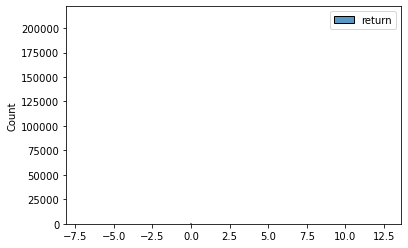

In [52]:
label = single_df[['return']]
label.describe()

sns.histplot(label)

In [ ]:
from xgboost import XGBRegressor


train_X, test_X, train_y, test_y = train_test_split(feature.values, label.values, test_size=0.25) # By default shuffle is true

my_imputer = SimpleImputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)

my_model = XGBRegressor(n_estimators=1000, 
                        max_depth=5, 
                        learning_rate=0.1, 
                        subsample=0.7, 
                        colsample_bytree=0.8, 
                        colsample_bylevel=0.8, 
                        base_score=train_y.mean(), 
                        random_state=42, seed=42)
hist = my_model.fit(train_X, train_y, 
                    early_stopping_rounds=5, 
                    eval_set=[(test_X, test_y)], eval_metric='rmse', 
                    verbose=100)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(15, 5), sharey=False)
fig.suptitle('Response histogram')

sns.lineplot(ax=axes[0,0],data= single_df , x = 'date',y='resp_1')
axes[0,0].set_title('resp_1')

sns.lineplot(ax=axes[0,1],data= single_df , x = 'date',y='resp_2')
axes[0,1].set_title('resp_2')

sns.lineplot(ax=axes[1,0],data= single_df , x = 'date',y='resp_3')
axes[1,0].set_title('resp_3')

sns.lineplot(ax=axes[1,1],data= single_df , x = 'date',y='resp_4')
axes[1,1].set_title('resp_4')

In [ ]:
!pip install dalex